In [44]:
import json
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import numpy as np
import random

In [45]:
# Open the JSON file
with open('../../data/GasLib-40/network.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)
    
    nodes = data['nodes']
    node_data = list(
        map(lambda v: (v['id'], v['x_coord'], v['y_coord']), 
            sorted(nodes.values(), key=lambda x:x['id'])
        )
    )
    pipes = data['pipes']
    pipe_data = list(
        map(lambda v: (v['id'], v['fr_node'], v['to_node']),
            sorted(pipes.values(), key=lambda x: x['id'])    
        )
    )
    compressors = data['compressors']
    compressor_data = list(
        map(lambda v: (v['id'], v['fr_node'], v['to_node']),
            sorted(compressors.values(), key=lambda x: x['id'])    
        )
    )
    entries = data['entries']
    exits = data['exits']
    entry_data = list(
        map(lambda v: (v['id'], v['node_id']),
            sorted(entries.values(), key=lambda x: x['id'])
        )
    )
    exit_data = list(
        map(lambda v: (v['id'], v['node_id']), 
            sorted(exits.values(), key=lambda x: x['id'])
        )
    )

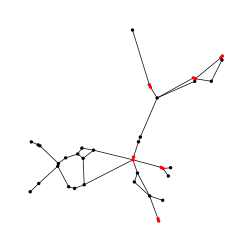

In [47]:
# Create an empty graph
fig, ax = plt.subplots()
G = nx.Graph()

import matplotlib
matplotlib.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size' : 12,
    'pgf.rcfonts': False,
})

from itertools import chain
compressor_node_data = list(map(lambda x: [x[1], x[2]], compressor_data))
compressor_nodes = list(set(chain.from_iterable(compressor_node_data)))

for (i, x, y) in node_data: 
    G.add_node(i, pos=(x, y))

color_map = []
for node in G:
    if node in compressor_nodes:
        color_map.append('red')
    else: 
        color_map.append('black')      

# Get the positions of the nodes
pos = nx.get_node_attributes(G, 'pos')
color = nx.get_node_attributes(G, 'color')

fr_nodes = list(map(lambda x: x[1], pipe_data)) 
to_nodes = list(map(lambda x: x[2], pipe_data))
fr_nodes += list(map(lambda x: x[1], compressor_data))
to_nodes += list(map(lambda x: x[2], compressor_data))

# Add edges
edges = zip(fr_nodes, to_nodes)
G.add_edges_from(edges)

fig.set_size_inches(3, 3)
nx.draw(G, pos=pos, node_color=color_map, node_size=2, width=0.5)

plt.savefig('GasLib-40.pdf')

plt.show()